# Training an IsolationForest Model and Visualizing Decision Boundaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [11]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [23]:
model = IsolationForest(random_state=16)

In [24]:
model.fit(X_train)

IsolationForest(random_state=16)

In [25]:
def plot_decision_boundaries(clf, dataset):
    # Change the plot's size.
    plt.rcParams['figure.figsize'] = [15, 15]

    # Plot of the decision frontier
    xx, yy = np.meshgrid(
        np.linspace(-2, 70, 100), 
        np.linspace(-2, 70, 100)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), 
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title("Decision Boundary (base model)")
    # This draw the "soft" or secondary boundaries.
    plt.contourf(xx, 
                 yy, 
                 Z, 
                 levels=np.linspace(Z.min(), 0, 8), 
                 cmap=plt.cm.PuBu, 
                 alpha=0.5)
    # This draw the line that separates the hard from the soft boundaries.
    plt.contour(xx, 
                yy, 
                Z, 
                levels=[0], 
                linewidths=2, 
                colors='darkred')
    # This draw the hard boundary
    plt.contourf(xx, 
                 yy, 
                 Z, 
                 levels=[0, Z.max()], 
                 colors='palevioletred')
    plt.scatter(dataset.iloc[:, 0],
                dataset.iloc[:, 1],
                edgecolors='k')
    plt.xlabel('Mean')
    plt.ylabel('SD')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


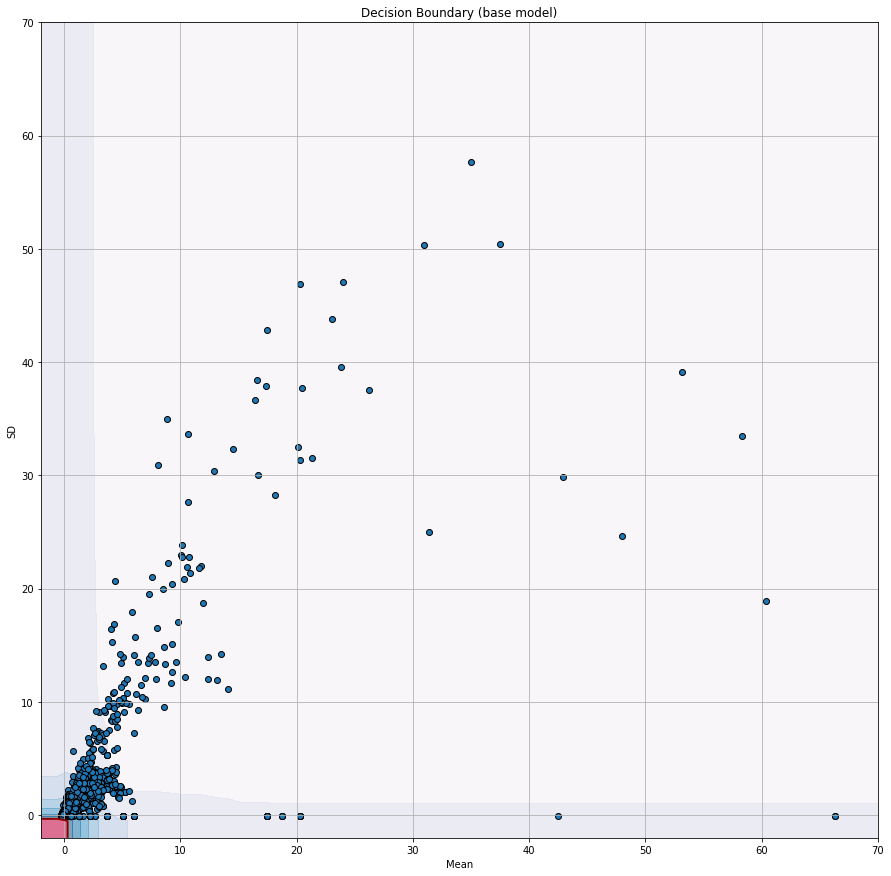

In [26]:
plot_decision_boundaries(model, train)

In [27]:
model = IsolationForest(random_state=16, contamination=0.001)

In [28]:
model.fit(X_train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


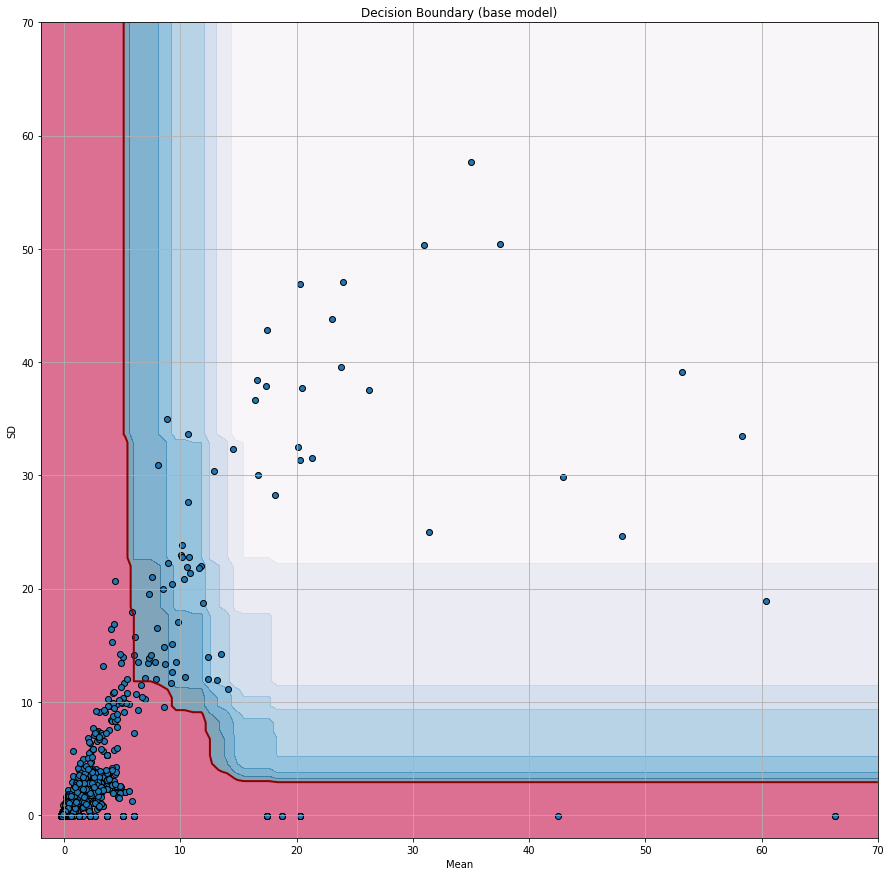

In [29]:
plot_decision_boundaries(model, X_train)

In [31]:
predictions = model.predict(X_test)

In [37]:
def plot_prediction_boundaries(clf, test_set, predictions):
    # Change the plot's size.
    plt.rcParams['figure.figsize'] = [15, 15]

    # Plot of the decision frontier
    xx, yy = np.meshgrid(
        np.linspace(-2, 70, 100), 
        np.linspace(-2, 70, 100)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), 
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    dataset = pd.concat([X_test, pd.Series(predictions)], axis=1)
    outliers = dataset[dataset.iloc[:, 2]==-1]
    inliers = dataset[dataset.iloc[:, 2]==1]
    plt.title("Decision Boundary (base model)")
    # This draw the "soft" or secondary boundaries.
    plt.contourf(xx, 
                 yy, 
                 Z, 
                 levels=np.linspace(Z.min(), 0, 8), 
                 cmap=plt.cm.PuBu, 
                 alpha=0.5)
    # This draw the line that separates the hard from the soft boundaries.
    plt.contour(xx, 
                yy, 
                Z, 
                levels=[0], 
                linewidths=2, 
                colors='darkred')
    # This draw the hard boundary
    plt.contourf(xx, 
                 yy, 
                 Z, 
                 levels=[0, Z.max()], 
                 colors='palevioletred')
    plt.scatter(inliers.iloc[:, 0],
                inliers.iloc[:, 1],
                color="blue")
    plt.scatter(outliers.iloc[:, 0],
                outliers.iloc[:, 1],
                color="red")
    plt.xlabel('Mean')
    plt.ylabel('SD')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


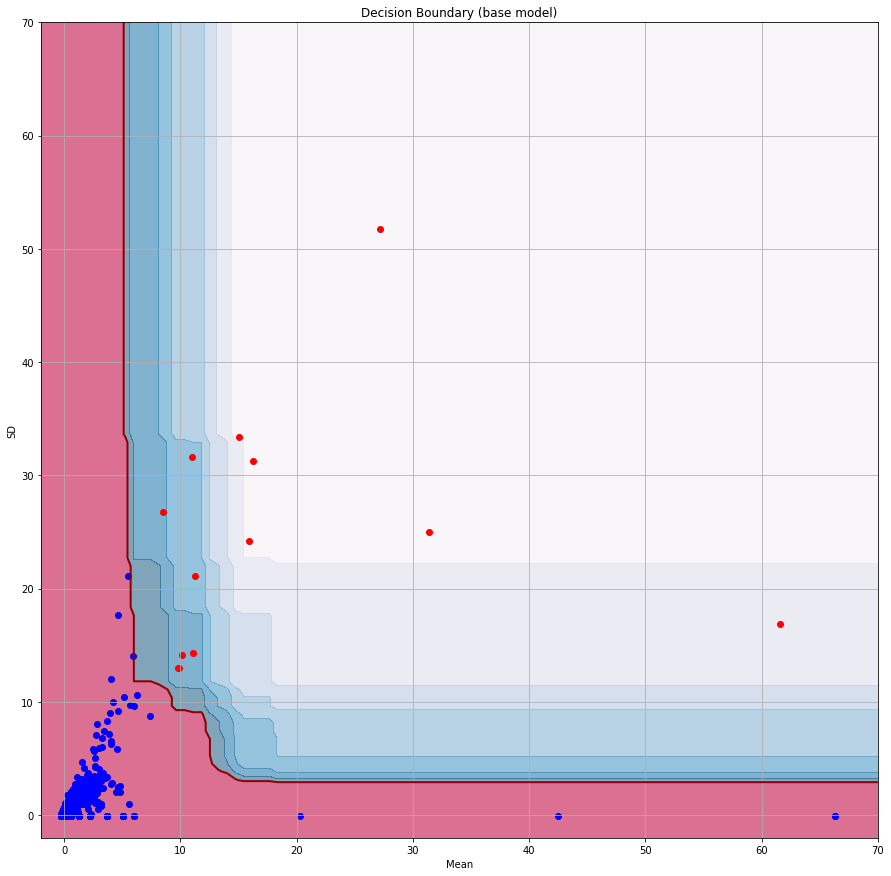

In [38]:
plot_prediction_boundaries(model, X_test, predictions)

## Dump Model

In [39]:
from joblib import dump

In [40]:
dump(model, "anomaly-model.joblib")

['anomaly-model.joblib']